# **Exercise: DNN - Boston Data**

Conduct the DNN analysis using the boston dataset. You are required to improve the performance of the model using different architecture.

In [1]:
from keras.datasets import boston_housing

#Loading data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (404, 13)
y_train shape (404,)
X_test shape (102, 13)
y_test shape (102,)


In [3]:
import numpy as np
# Check for missing values in X training set
print(np.isnan(X_train).sum())
# Check for missing values in y training set
print(np.isnan(y_train).sum())

# Check for missing values in X test set
print(np.isnan(X_test).sum())
# Check for missing values in y test set
print(np.isnan(y_test).sum())

0
0
0
0


In [4]:
#Normalization is required as cross diferent features, there are different units, preferably to standardize it. 
#Neural network can do normalisation such as SGD model, but can choose not to normalise for other models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit transform on train  (to get mean and stadard deviation)
X_test = scaler.transform(X_test) #only transform on test (to use info from train)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dense = linear equation (NN uses linear equation)
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [6]:
#Building the base model
L1 = 50
L2 = 50
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu')) #input_dim is the total of input variable
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))


#output layer
model.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

In [7]:
#Compile the sequential model
model.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

In [8]:
#Training the model
history = model.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 7s 27ms/step - loss: 528.0834 - mae: 21.2005 - val_loss: 493.0650 - val_mae: 20.5026
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 425.2881 - mae: 18.8072 - val_loss: 372.0327 - val_mae: 17.5358
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 299.6265 - mae: 15.4241 - val_loss: 235.2423 - val_mae: 13.4313
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 175.5212 - mae: 11.0941 - val_loss: 127.0793 - val_mae: 9.5116
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 95.9027 - mae: 7.6880 - val_loss: 75.7756 - val_mae: 6.9935
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 63.5794 - mae: 6.1269 - val_loss: 59.1839 - val_mae: 6.0528
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 49.4321 - mae: 5.2519 - val_loss: 44.8063 - val_mae: 5.2295
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - lo

<Figure size 640x480 with 0 Axes>

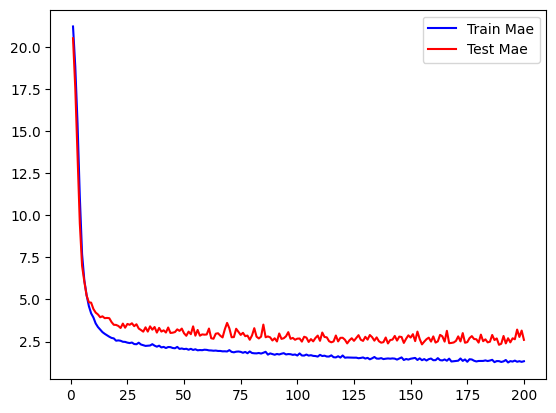

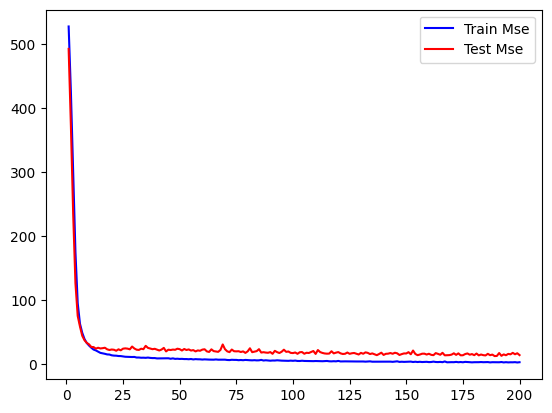

<Figure size 640x480 with 0 Axes>

In [10]:
#Visualisation of Base model
import pandas as pd
import matplotlib.pyplot as plt
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(mae)+1)

plt.plot(epochs , mae,'b', label = 'Train Mae')
plt.plot (epochs, val_mae, 'r', label = 'Test Mae')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Mse')
plt.plot (epochs, val_loss, 'r', label = 'Test Mse')
plt.legend()
plt.figure()

In [26]:
#Create Model with Regularization (Lasso)
L1 = 50
L2 = 50
L3 = 50

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l1(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model2.add(Dense(L2, activation = 'relu'))
model2.add(Dense(L3, activation = 'relu'))


#output layer
model2.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model2.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history2 = model2.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 524.9185 - mae: 21.0170 - val_loss: 470.1991 - val_mae: 19.8057
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 393.3563 - mae: 17.7546 - val_loss: 313.2621 - val_mae: 15.5983
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 248.3952 - mae: 13.4675 - val_loss: 190.9325 - val_mae: 11.7210
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 140.1547 - mae: 9.5610 - val_loss: 103.3191 - val_mae: 8.3479
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 76.9725 - mae: 6.8306 - val_loss: 67.1296 - val_mae: 6.7346
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 53.2495 - mae: 5.5081 - val_loss: 59.0547 - val_mae: 6.1855
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 45.7719 - mae: 4.9613 - val_loss: 46.5434 - val_mae: 5.3627
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - los

<Figure size 640x480 with 0 Axes>

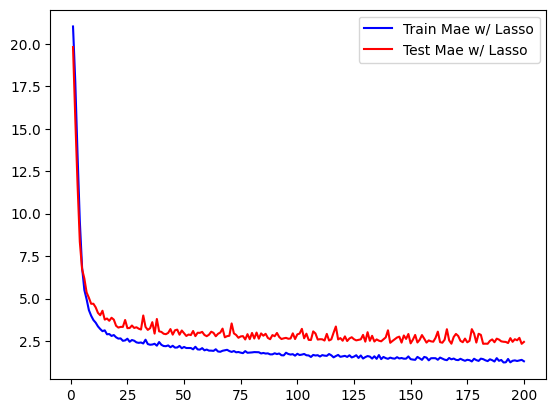

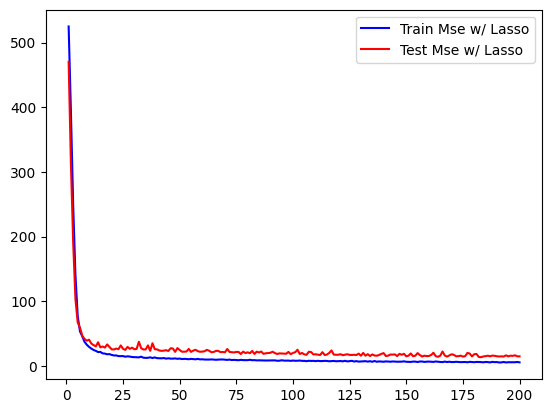

<Figure size 640x480 with 0 Axes>

In [27]:
#Visualisation of Regularization model
mae2 = history2.history['mae']
val_mae2 = history2.history['val_mae']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1,len(mae2)+1)

plt.plot(epochs , mae2,'b', label = 'Train Mae w/ Lasso')
plt.plot (epochs, val_mae2, 'r', label = 'Test Mae w/ Lasso')
plt.legend()
plt.figure()

plt.plot(epochs , loss2,'b', label = 'Train Mse w/ Lasso')
plt.plot (epochs, val_loss2, 'r', label = 'Test Mse w/ Lasso')
plt.legend()
plt.figure()

In [28]:
#Create Model with Regularization (Ridge)
L1 = 50
L2 = 50
L3 = 50

model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model3.add(Dense(L2, activation = 'relu'))
model3.add(Dense(L3, activation = 'relu'))


#output layer
model3.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model3.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history3 = model3.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 23ms/step - loss: 534.8376 - mae: 21.0773 - val_loss: 479.4059 - val_mae: 19.8142
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 408.1942 - mae: 17.7853 - val_loss: 351.1582 - val_mae: 16.4419
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 285.1523 - mae: 14.2715 - val_loss: 231.4952 - val_mae: 12.9474
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 179.4169 - mae: 10.8365 - val_loss: 129.9245 - val_mae: 9.2136
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 104.0480 - mae: 7.7657 - val_loss: 88.2863 - val_mae: 7.3259
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 71.3586 - mae: 6.1940 - val_loss: 66.4887 - val_mae: 6.4658
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 53.5179 - mae: 5.3277 - val_loss: 54.9795 - val_mae: 5.8767
Epoch 8/200
9/9 [==============================] - 0s 6ms/step - l

<Figure size 640x480 with 0 Axes>

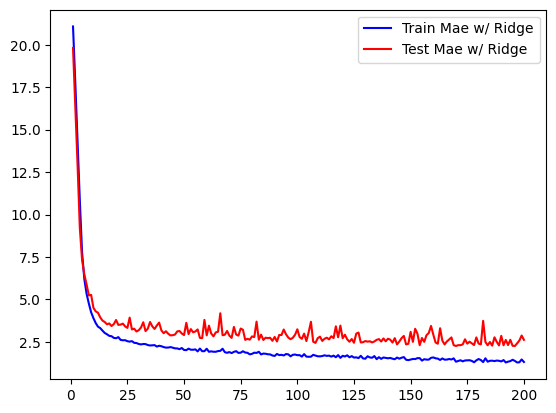

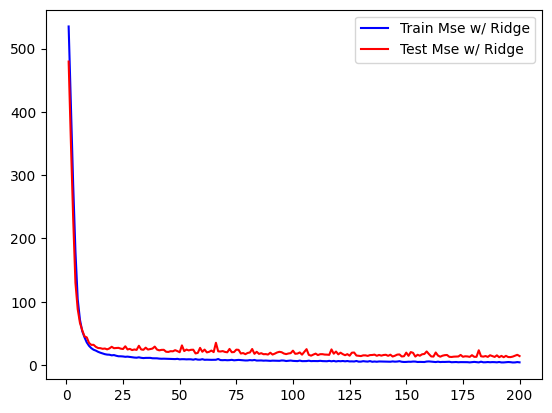

<Figure size 640x480 with 0 Axes>

In [29]:
#Visualisation of Regularization model
mae3 = history3.history['mae']
val_mae3 = history3.history['val_mae']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1,len(mae3)+1)

plt.plot(epochs , mae3,'b', label = 'Train Mae w/ Ridge')
plt.plot (epochs, val_mae3, 'r', label = 'Test Mae w/ Ridge')
plt.legend()
plt.figure()

plt.plot(epochs , loss3,'b', label = 'Train Mse w/ Ridge')
plt.plot (epochs, val_loss3, 'r', label = 'Test Mse w/ Ridge')
plt.legend()
plt.figure()

# **Comment: LASSO Regularization has not shown any improvement on the performance compared to base model. But RIDGE Regularization shown slight improvement. Hence, will proceed to develop the model using RIDGE model.**

In [30]:
#Create Model with Regularization (Ridge) with dropout
L1 = 50
L2 = 50
L3 = 50

model4 = Sequential()
model4.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model4.add(Dense(L2, activation = 'relu'))
model4.add(Dense(L3, activation = 'relu'))
model4.add(Dropout(rate=0.2))

#output layer
model4.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model4.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history4 = model4.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 23ms/step - loss: 503.1405 - mae: 20.5216 - val_loss: 429.3595 - val_mae: 18.8179
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 340.1935 - mae: 16.3512 - val_loss: 257.1930 - val_mae: 13.8550
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 190.0967 - mae: 11.4560 - val_loss: 138.0454 - val_mae: 9.6963
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 104.9364 - mae: 7.8714 - val_loss: 86.6145 - val_mae: 7.2617
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 77.8848 - mae: 6.7883 - val_loss: 69.1815 - val_mae: 6.3060
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 56.5094 - mae: 5.6843 - val_loss: 54.8962 - val_mae: 5.5791
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 46.0032 - mae: 4.9354 - val_loss: 44.5998 - val_mae: 5.2185
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss:

<Figure size 640x480 with 0 Axes>

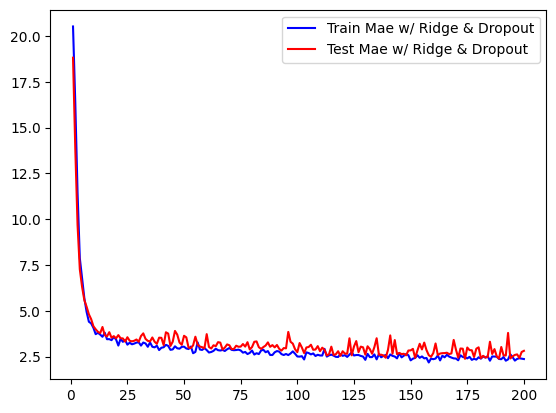

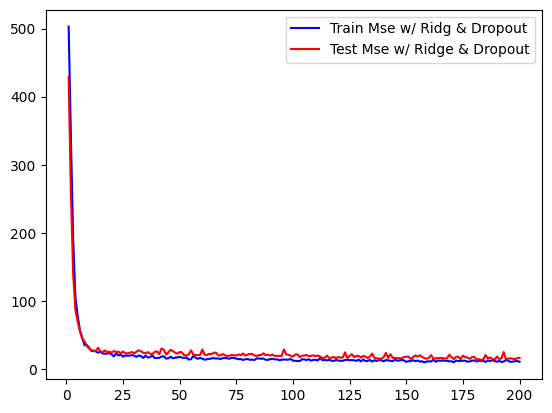

<Figure size 640x480 with 0 Axes>

In [31]:
#Visualisation of L2 Regularization & Dropout model
mae4 = history4.history['mae']
val_mae4 = history4.history['val_mae']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1,len(mae4)+1)

plt.plot(epochs , mae4,'b', label = 'Train Mae w/ Ridge & Dropout')
plt.plot (epochs, val_mae4, 'r', label = 'Test Mae w/ Ridge & Dropout')
plt.legend()
plt.figure()

plt.plot(epochs , loss4,'b', label = 'Train Mse w/ Ridg & Dropout')
plt.plot (epochs, val_loss4, 'r', label = 'Test Mse w/ Ridge & Dropout')
plt.legend()
plt.figure()

# **Comment: Dropout has worsen the performance of the model, however it has closed the gap caused by overfitting.**

# **Also noted that the loss has been fluctuating, will include early stopping in the next model.**

In [37]:
from keras.callbacks import EarlyStopping

#Create Model with Regularization (Ridge) with dropout & early stopping
L1 = 50
L2 = 50
L3 = 50

model5 = Sequential()
model5.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model5.add(Dense(L2, activation = 'relu'))
model5.add(Dense(L3, activation = 'relu'))
model5.add(Dropout(rate=0.2))

#output layer
model5.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model5.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Early Stopping
early_stopping_monitor = EarlyStopping(patience = 10)

#Training the model 
history5 = model5.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test),callbacks =[early_stopping_monitor])

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 523.8500 - mae: 21.0370 - val_loss: 470.4336 - val_mae: 19.8011
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 409.2168 - mae: 18.2022 - val_loss: 350.6063 - val_mae: 16.6022
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 291.6482 - mae: 14.9148 - val_loss: 224.3198 - val_mae: 12.9555
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 193.1156 - mae: 11.7173 - val_loss: 139.2859 - val_mae: 10.0027
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 128.9528 - mae: 9.2813 - val_loss: 95.0854 - val_mae: 8.0127
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 89.2282 - mae: 7.5271 - val_loss: 74.9608 - val_mae: 6.8906
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 74.2562 - mae: 6.7523 - val_loss: 60.7137 - val_mae: 6.2029
Epoch 8/200
9/9 [==============================] - 0s 7ms/step - 

<Figure size 640x480 with 0 Axes>

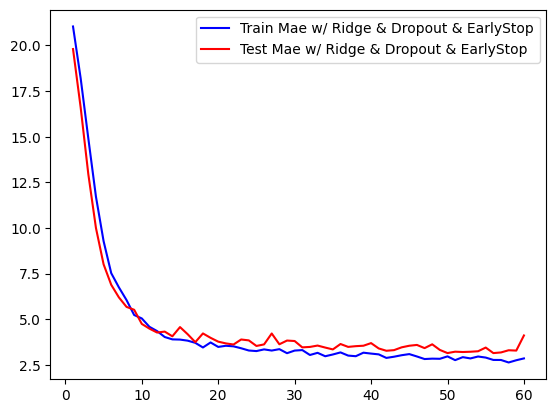

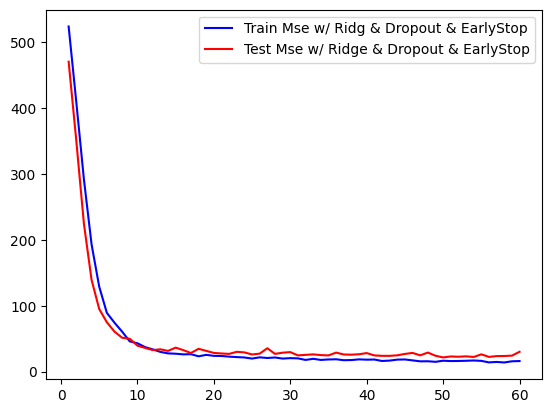

<Figure size 640x480 with 0 Axes>

In [38]:
#Visualisation of L2 Regularization & Dropout & Early Stopping model
mae5 = history5.history['mae']
val_mae5 = history5.history['val_mae']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1,len(mae5)+1)

plt.plot(epochs , mae5,'b', label = 'Train Mae w/ Ridge & Dropout & EarlyStop')
plt.plot (epochs, val_mae5, 'r', label = 'Test Mae w/ Ridge & Dropout & EarlyStop')
plt.legend()
plt.figure()

plt.plot(epochs , loss5,'b', label = 'Train Mse w/ Ridg & Dropout & EarlyStop')
plt.plot (epochs, val_loss5, 'r', label = 'Test Mse w/ Ridge & Dropout & EarlyStop')
plt.legend()
plt.figure()

# **Comment: Early Stopping had worsen model performance and causes overfitting to re-emerge. Hence, will not be using early stopping as the performance requires longer epochs to converge and achieve better results.**

In [39]:
#Create Model with Regularization (Ridge) with dropout +1 hidden layer
L1 = 50
L2 = 50
L3 = 50
L4 = 50

model6 = Sequential()
model6.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model6.add(Dense(L2, activation = 'relu'))
model6.add(Dense(L3, activation = 'relu'))
model6.add(Dense(L4, activation = 'relu'))
model6.add(Dropout(rate=0.2))

#output layer
model6.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model6.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history6 = model6.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 2s 25ms/step - loss: 546.5681 - mae: 21.4582 - val_loss: 506.3823 - val_mae: 20.4662
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 421.8959 - mae: 18.2252 - val_loss: 339.6443 - val_mae: 16.0260
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 255.1747 - mae: 13.3974 - val_loss: 193.6941 - val_mae: 11.6578
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 147.1188 - mae: 10.0787 - val_loss: 107.7210 - val_mae: 8.5356
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 88.6426 - mae: 7.4661 - val_loss: 89.0572 - val_mae: 7.5610
Epoch 6/200
9/9 [==============================] - 0s 10ms/step - loss: 66.2857 - mae: 6.1380 - val_loss: 77.6122 - val_mae: 6.8907
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 55.6471 - mae: 5.5711 - val_loss: 62.7450 - val_mae: 6.1868
Epoch 8/200
9/9 [==============================] - 0s 11ms/step -

<Figure size 640x480 with 0 Axes>

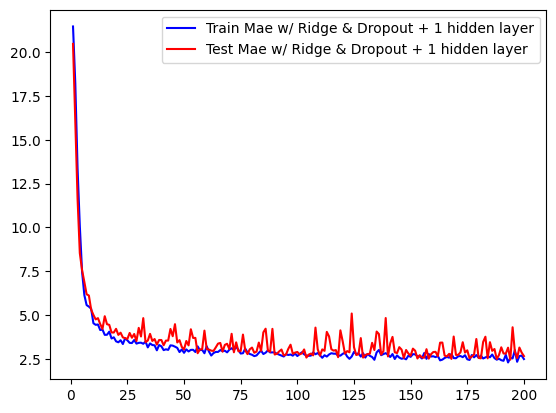

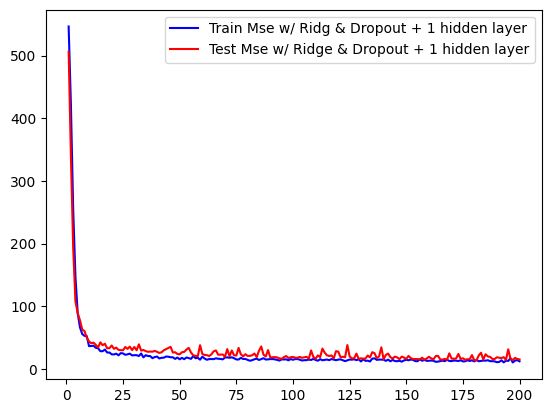

<Figure size 640x480 with 0 Axes>

In [40]:
#Visualisation of L2 Regularization & Dropout + 1 hidden layer
mae6 = history6.history['mae']
val_mae6 = history6.history['val_mae']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(1,len(mae6)+1)

plt.plot(epochs , mae6,'b', label = 'Train Mae w/ Ridge & Dropout + 1 hidden layer')
plt.plot (epochs, val_mae6, 'r', label = 'Test Mae w/ Ridge & Dropout + 1 hidden layer')
plt.legend()
plt.figure()

plt.plot(epochs , loss6,'b', label = 'Train Mse w/ Ridg & Dropout + 1 hidden layer')
plt.plot (epochs, val_loss6, 'r', label = 'Test Mse w/ Ridge & Dropout + 1 hidden layer')
plt.legend()
plt.figure()

# **Comment: No significant improvement noted from adding additional hidden layer. Will retain the model architecture with only 2 hidden layers.**

# **Will perform a grid search on optimal parameters with the architecture of:**
**1. 2 hidden layers**

**2. L2 Regularization**

**3. Dropout at 20%**


In [41]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [69]:
#Function to create model, required for Keras Regressor
def create_model(activation = 'relu',activation2 ='linear',neuron1 = 50, neuron2 = 50,neuron3 = 50, droprate = 0.2, optimizer = 'rmsprop'):

  model = Sequential()
  model.add(Dense(neuron1, input_dim = 13, activation =activation,
                  kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l2(0.01)))
  model.add(Dense(neuron2, activation = activation))
  model.add(Dense(neuron3, activation = activation))
  model.add(Dropout(rate=droprate))
  model.add(Dense(1, activation = activation2))

  #Compile Model
  model.compile(loss = 'mse',
                optimizer = optimizer, metrics = 'mae')
  return model

In [ ]:
#Create model
model = KerasRegressor(model=create_model,
                        verbose = 0)

#define the grid search parameters
droprate = [0.2]
neuron = [50,100]
neuron2 = [50,100]
neuron3 = [50,100]
optimizer = ['SGD','RMSprop','Adagrad','Adadelta',
             'Adam','Addamax','Nadam']
activation = ['softplus','softsign','relu',
             'tanh','linear']


param_grid = dict(model__activation= activation, model__activation2 = activation, batch_size = [100], epochs = [200],optimizer = optimizer, model__neuron1 = neuron, model__neuron2 = neuron2, model__neuron3 = neuron3, model__droprate = droprate)
grid = GridSearchCV(estimator = model,
                    param_grid=param_grid,
                    n_jobs = -1, cv=3,error_score='raise')
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# **Pending results**

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds,params):
  print("%f (%f) with: %r" % (mean,stdev,param))